In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd()
filesnames = os.listdir('home-credit-default-risk/')

In [3]:
filesnames

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [4]:
aplication_test_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[0])
aplication_train_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[1])
bureau_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[2])
bureau_balance_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[3])
credit_card_balance_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[4])
installments_payments_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[6])
POS_CASH_balance_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[7])
previous_application_original_df = pd.read_csv('home-credit-default-risk/'+filesnames[8])

aplication_train_df = aplication_train_original_df.copy()
aplication_test_df = aplication_test_original_df.copy()
bureau_df = bureau_original_df.copy()
bureau_balance_df = bureau_balance_original_df.copy()
credit_card_balance_df = credit_card_balance_original_df.copy()
installments_payments_df = installments_payments_original_df.copy()
POS_CASH_balance_df = POS_CASH_balance_original_df.copy()
previous_application_df = previous_application_original_df.copy()

In [5]:
def show_null_values(df):
    null_value_list=[]
    for i in range(len(df.columns)):
        null_value = df.isnull().sum().values[i]
        if null_value !=0:
            null_value_list.append(df.columns[i])
    return null_value_list

## Breau dataset
- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [6]:
bureau_df.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


In [7]:
show_null_values(bureau_df)

['DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_ANNUITY']

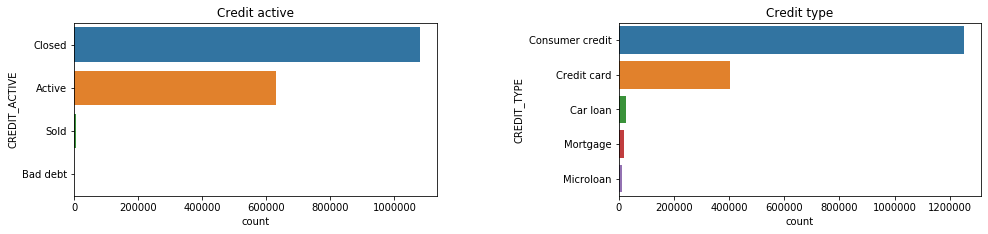

In [8]:
fig, axis = plt.subplots(1,2, figsize=(14, 3))
sns.countplot(ax=axis[0], y="CREDIT_ACTIVE", data= bureau_df)
axis[0].title.set_text('Credit active')

sns.countplot(ax=axis[1], y="CREDIT_TYPE", data= bureau_df, order=bureau_df.CREDIT_TYPE.value_counts().iloc[:5].index)
axis[1].title.set_text('Credit type')

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()

## Bureau Balance
- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [9]:
bureau_balance_df.head(2)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C


In [10]:
show_null_values(bureau_balance_df)

[]

Text(0.5, 1.0, 'Bureau balance STATUS')

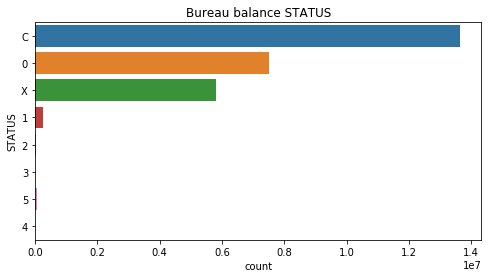

In [11]:
fig, axis = plt.subplots( figsize=(8, 4))
sns.countplot(y="STATUS", data= bureau_balance_df)
plt.title('Bureau balance STATUS')

## POS CASH balance
- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


In [12]:
POS_CASH_balance_df.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


In [13]:
show_null_values(POS_CASH_balance_df)

['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

Text(0.5, 1.0, 'Name Contract POS CASH')

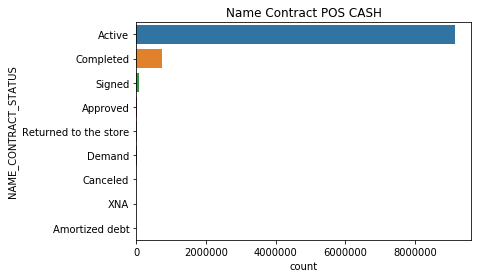

In [14]:
sns.countplot(y='NAME_CONTRACT_STATUS',data= POS_CASH_balance_df)
plt.title('Name Contract POS CASH')

## Previous Application
- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

In [15]:
previous_application_df.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [16]:
show_null_values(previous_application_df)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [17]:
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


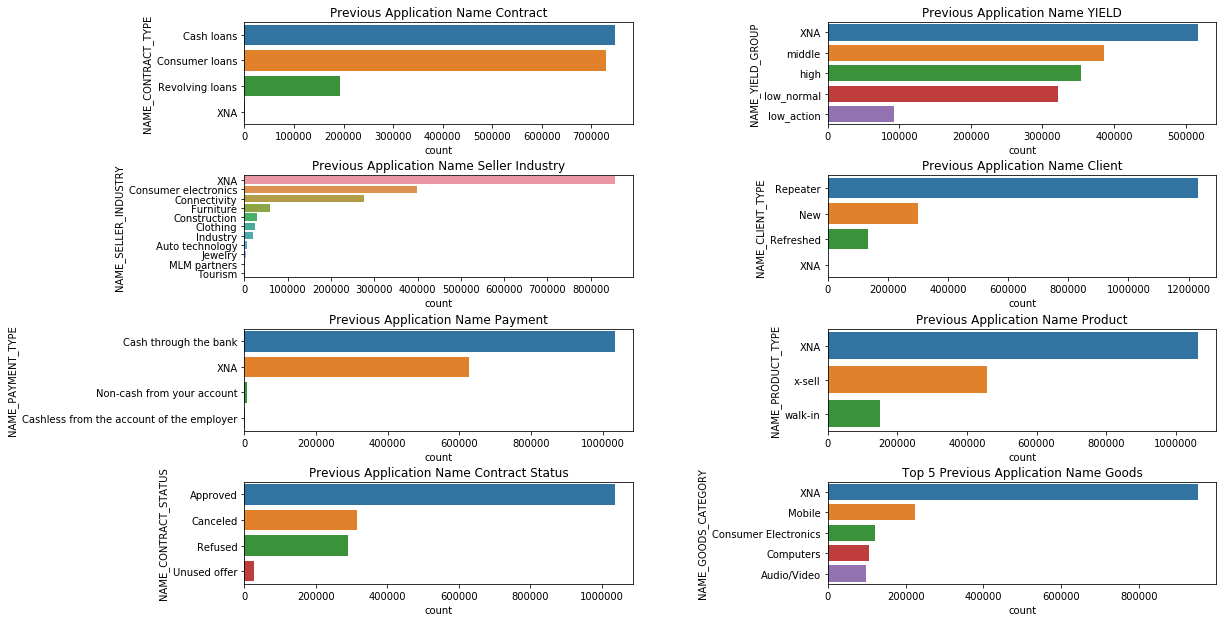

In [18]:
fig, axis = plt.subplots(4,2, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], y="NAME_CONTRACT_TYPE", data= previous_application_df,
               order = previous_application_df['NAME_CONTRACT_TYPE'].value_counts().index)
axis[0, 0].title.set_text('Previous Application Name Contract')

sns.countplot(ax=axis[0, 1], y="NAME_YIELD_GROUP", data= previous_application_df, 
              order = previous_application_df['NAME_YIELD_GROUP'].value_counts().index)
axis[0, 1].title.set_text('Previous Application Name YIELD')

sns.countplot(ax=axis[1,0], y="NAME_SELLER_INDUSTRY", data= previous_application_df,
             order = previous_application_df['NAME_SELLER_INDUSTRY'].value_counts().index)
axis[1, 0].title.set_text('Previous Application Name Seller Industry')

sns.countplot(ax=axis[1,1], y="NAME_CLIENT_TYPE", data= previous_application_df,
             order = previous_application_df['NAME_CLIENT_TYPE'].value_counts().index)
axis[1, 1].title.set_text('Previous Application Name Client')

sns.countplot(ax=axis[2,0], y="NAME_PAYMENT_TYPE", data= previous_application_df,
             order = previous_application_df['NAME_PAYMENT_TYPE'].value_counts().index)
axis[2, 0].title.set_text('Previous Application Name Payment')

sns.countplot(ax=axis[2,1], y="NAME_PRODUCT_TYPE", data= previous_application_df,
             order = previous_application_df['NAME_PRODUCT_TYPE'].value_counts().index)
axis[2, 1].title.set_text('Previous Application Name Product')

sns.countplot(ax=axis[3,0], y="NAME_CONTRACT_STATUS", data= previous_application_df,
             order = previous_application_df['NAME_CONTRACT_STATUS'].value_counts().index)
axis[3, 0].title.set_text('Previous Application Name Contract Status')


sns.countplot(ax=axis[3,1], y="NAME_GOODS_CATEGORY",  data= previous_application_df,
             order = previous_application_df['NAME_GOODS_CATEGORY'].value_counts().iloc[:5].index)
axis[3, 1].title.set_text('Top 5 Previous Application Name Goods')


plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()

## Credit Card Balance
- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [19]:
credit_card_balance_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [20]:
show_null_values(credit_card_balance_df)

['AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM']

Text(0.5, 1.0, 'Cash balance name contract status')

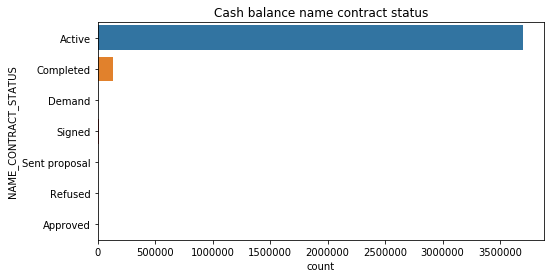

In [21]:
fig, axis = plt.subplots( figsize=(8, 4))
sns.countplot(y="NAME_CONTRACT_STATUS", data= credit_card_balance_df)
plt.title('Cash balance name contract status')

## Installments Payment 
- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [22]:
installments_payments_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [23]:
show_null_values(installments_payments_df)

['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

## Application Train

In [24]:
aplication_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
show_null_values(aplication_train_df)

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

Text(0.5, 1.0, 'TARGET')

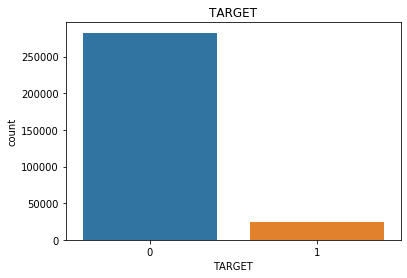

In [26]:
sns.countplot(x='TARGET', data=aplication_train_df)
plt.title('TARGET')

In [27]:
aplication_train_df["DAYS_BIRTH"] = abs(aplication_train_df["DAYS_BIRTH"]//365)

Text(0.5, 1, 'AGE')

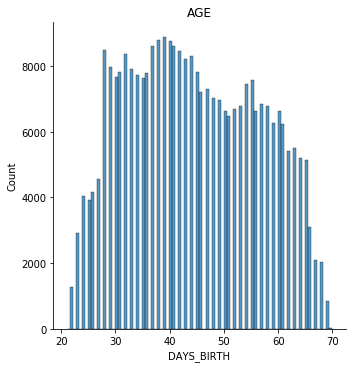

In [28]:
sns.displot(aplication_train_df, x="DAYS_BIRTH")
plt.title('AGE')

Text(0.5, 1.0, 'AGE by TARGET')

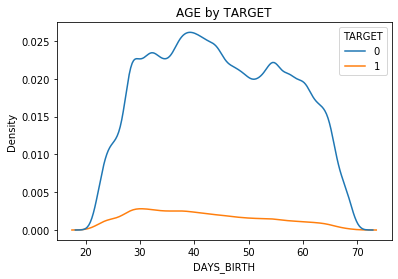

In [29]:
sns.kdeplot(data=aplication_train_df, x="DAYS_BIRTH", hue="TARGET")
plt.title('AGE by TARGET')

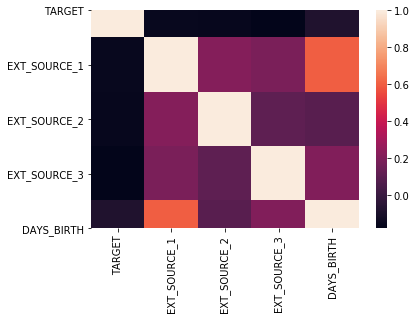

In [30]:
sns.heatmap(aplication_train_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr())

In [31]:
aplication_train_df['CREDIT_INCOME_PERCENT'] = aplication_train_df['AMT_CREDIT'] / aplication_train_df['AMT_INCOME_TOTAL']
aplication_train_df['ANNUITY_INCOME_PERCENT'] = aplication_train_df['AMT_ANNUITY'] / aplication_train_df['AMT_INCOME_TOTAL']
aplication_train_df['CREDIT_TERM'] = aplication_train_df['AMT_ANNUITY'] / aplication_train_df['AMT_CREDIT']
aplication_train_df['DAYS_EMPLOYED_PERCENT'] = aplication_train_df['DAYS_EMPLOYED'] / aplication_train_df['DAYS_BIRTH']

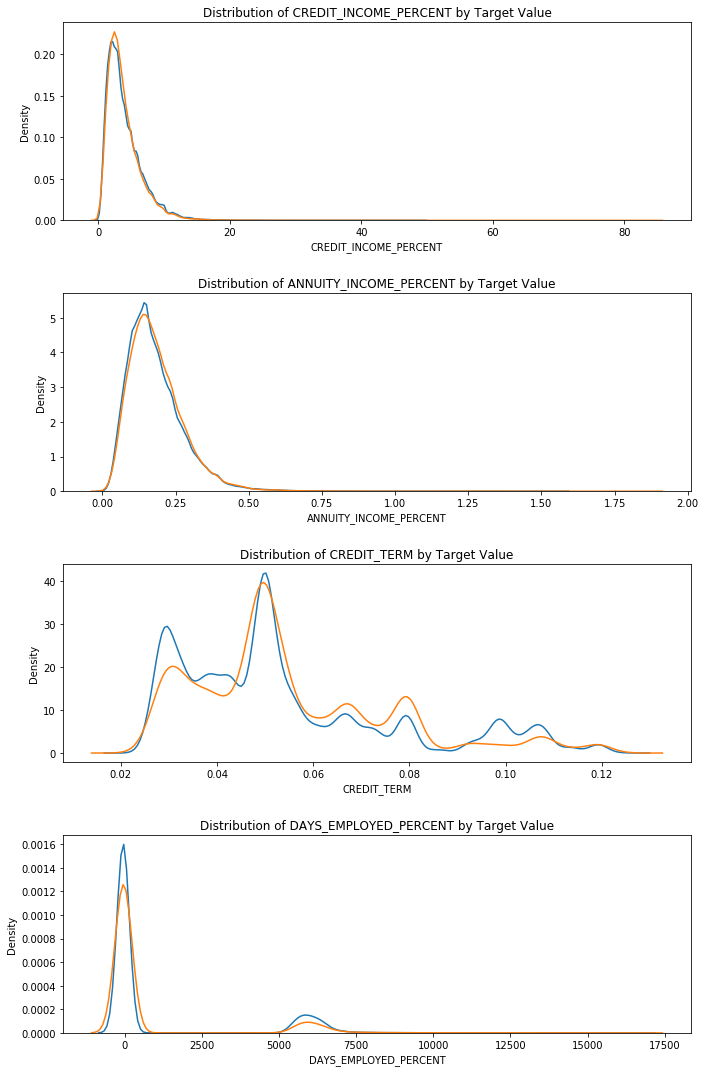

In [32]:
plt.figure(figsize=(10, 15))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 
                             'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(aplication_train_df.loc[aplication_train_df["TARGET"] == 0, feature], label="target == 0")
    sns.kdeplot(aplication_train_df.loc[aplication_train_df["TARGET"] == 1, feature], label="target == 1")
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel("%s" % feature)
    plt.ylabel("Density")
    
plt.tight_layout(h_pad=2.5)

In [33]:
aplication_train_df.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.121978,0.060749,-24.5


In [34]:
aplication_train_numeric_df= aplication_train_df[aplication_train_df.columns[aplication_train_df.dtypes!=object].tolist()]
aplication_train_numeric_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,26,-637,...,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.121978,0.060749,-24.500000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,46,-1188,...,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,0.132217,0.027598,-25.826087
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,53,-225,...,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.100000,0.050000,-4.245283
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,53,-3039,...,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0.219900,0.094941,-57.339623
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,55,-3038,...,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,0.179963,0.042623,-55.236364


In [35]:
show_null_values(aplication_train_numeric_df)

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [36]:
aplication_train_continuous_df= aplication_train_df[aplication_train_df.columns[aplication_train_df.dtypes==float].tolist()]
aplication_train_continuous_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.121978,0.060749,-24.500000
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,0.132217,0.027598,-25.826087
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.100000,0.050000,-4.245283
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0.219900,0.094941,-57.339623
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,0.179963,0.042623,-55.236364


In [37]:
show_null_values(aplication_train_continuous_df)

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [38]:
aplication_train_continuous_df2 = aplication_train_continuous_df.columns[aplication_train_continuous_df.isnull().sum()!=0].tolist()

In [39]:
for i in range(len(aplication_train_continuous_df2 )):
    aplication_train_continuous_df[aplication_train_continuous_df2[i]] =aplication_train_continuous_df[aplication_train_continuous_df2[i]].fillna(aplication_train_continuous_df[aplication_train_continuous_df2[i]]).mean()

In [40]:
show_null_values(aplication_train_continuous_df)

[]

In [41]:
aplication_train_numeric_df[aplication_train_continuous_df.columns] = aplication_train_continuous_df[aplication_train_continuous_df.columns]
aplication_train_numeric_df.head(1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,0,202500.0,406597.5,27108.573909,538396.207429,0.018801,26,-637,...,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,2.007889,0.18093,0.053695,-24.5


In [42]:
show_null_values(aplication_train_numeric_df)

[]

In [43]:
aplication_train_categorical_df= aplication_train_df[aplication_train_df.columns[aplication_train_df.dtypes==object].tolist()]
aplication_train_categorical_df.head(1)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No


In [44]:
show_null_values(aplication_train_categorical_df)

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

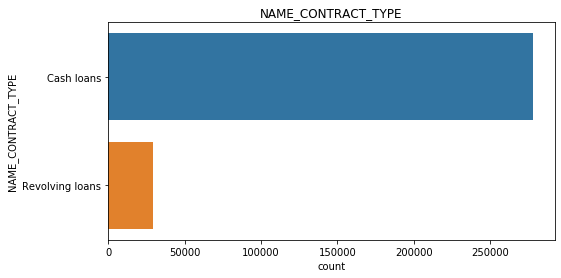

<Figure size 720x432 with 0 Axes>

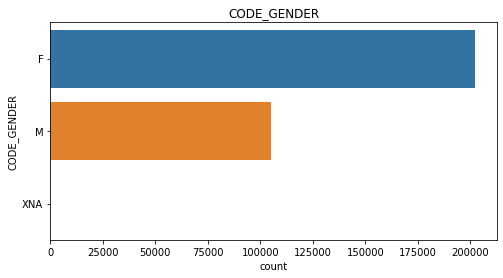

<Figure size 720x432 with 0 Axes>

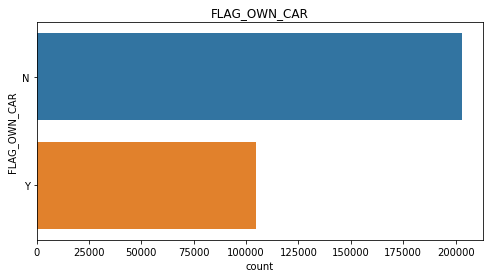

<Figure size 720x432 with 0 Axes>

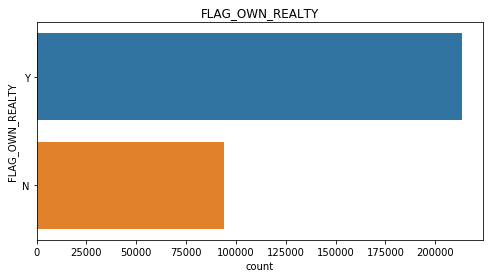

<Figure size 720x432 with 0 Axes>

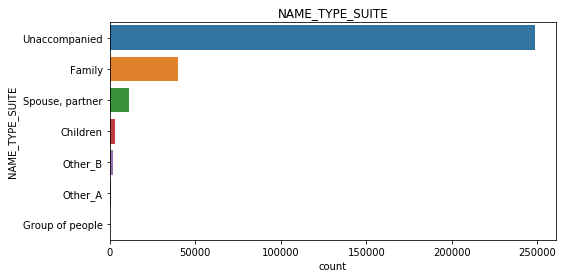

<Figure size 720x432 with 0 Axes>

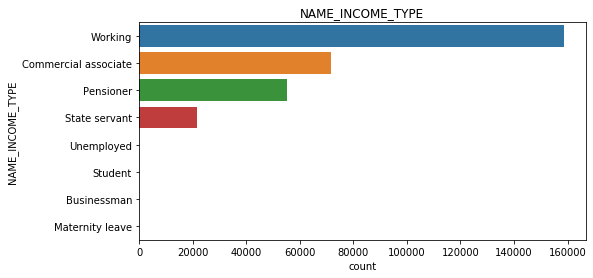

<Figure size 720x432 with 0 Axes>

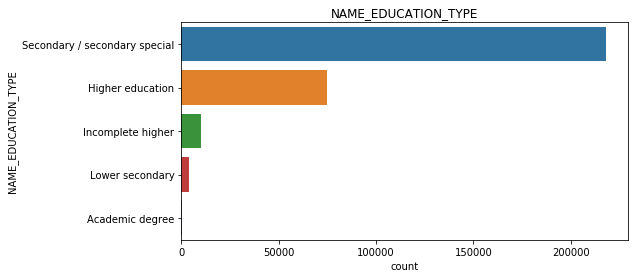

<Figure size 720x432 with 0 Axes>

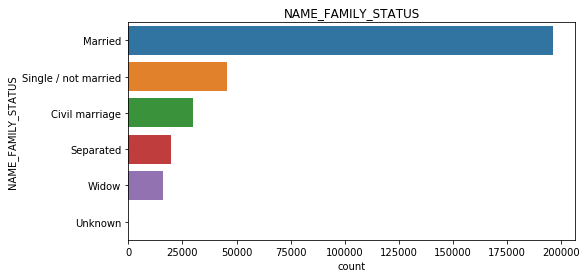

<Figure size 720x432 with 0 Axes>

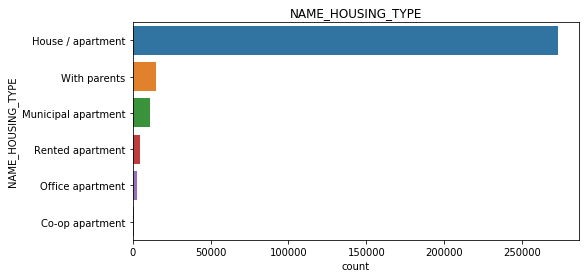

<Figure size 720x432 with 0 Axes>

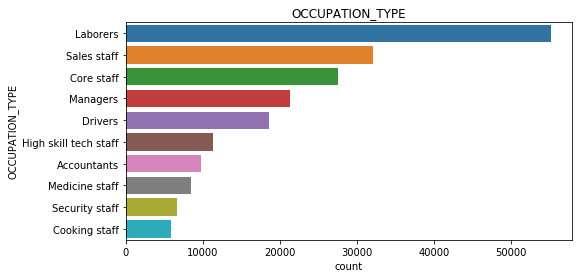

<Figure size 720x432 with 0 Axes>

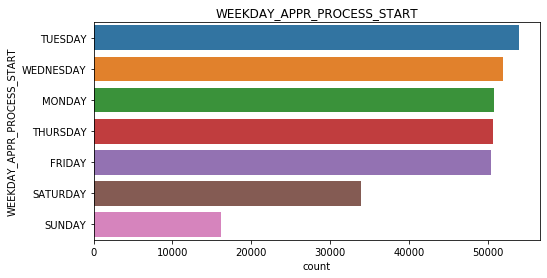

<Figure size 720x432 with 0 Axes>

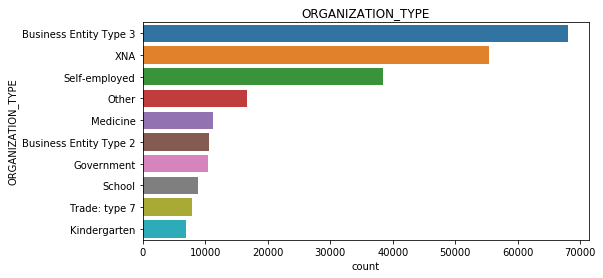

<Figure size 720x432 with 0 Axes>

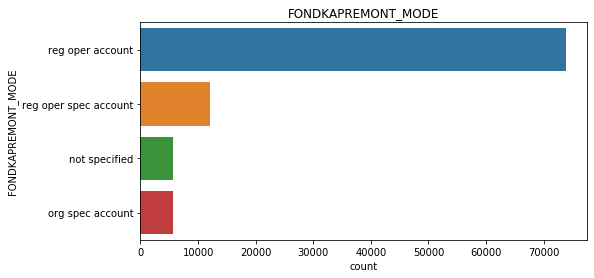

<Figure size 720x432 with 0 Axes>

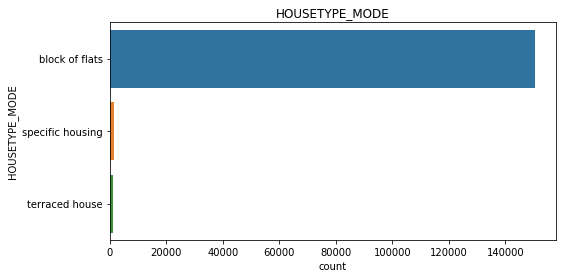

<Figure size 720x432 with 0 Axes>

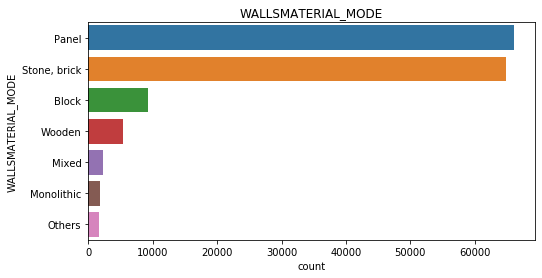

<Figure size 720x432 with 0 Axes>

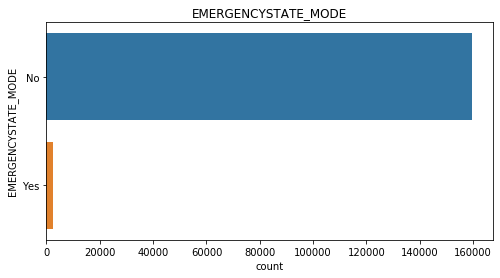

<Figure size 720x432 with 0 Axes>

In [45]:
for i in range(len(aplication_train_categorical_df.columns)):
    fig = plt.figure(figsize=(8,4))
    sns.countplot(y =aplication_train_categorical_df.columns[i] , data = aplication_train_categorical_df,
                 order = aplication_train_categorical_df[aplication_train_categorical_df.columns[i]].value_counts().iloc[:10].index)
    plt.title(str(aplication_train_categorical_df.columns[i]))
    plt.figure(figsize=(10,6))

In [46]:
show_null_values(aplication_train_categorical_df)

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [47]:
application_train_categorical_null_column = show_null_values(aplication_train_categorical_df)

In [48]:
for i in application_train_categorical_null_column:
    aplication_train_categorical_df[i].fillna(aplication_train_categorical_df[i].mode()[0], inplace=True)

In [49]:
show_null_values(aplication_train_categorical_df)

[]

In [50]:
aplication_train_categorical_df.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel,No


In [51]:
aplication_train_categorical_df_column = aplication_train_categorical_df.columns

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
train_categorical_df = aplication_train_categorical_df.apply(lambda aplication_train_categorical_df_column : le.fit_transform(aplication_train_categorical_df_column)) 
train_categorical_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,2,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,2,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,11,2,0,4,0
3,0,0,0,1,6,7,4,0,1,8,6,5,2,0,4,0
4,0,1,0,1,6,7,4,3,1,3,4,37,2,0,4,0


In [53]:
aplication_train_df[aplication_train_categorical_df_column] =train_categorical_df[aplication_train_categorical_df_column]


aplication_train_df[aplication_train_numeric_df.columns] = aplication_train_numeric_df[aplication_train_numeric_df.columns]

In [54]:
show_null_values(aplication_train_df)

[]

In [55]:
aplication_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,0,1,0,1,0,202500.0,406597.5,27108.573909,...,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,2.007889,0.18093,0.053695,-24.500000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,27108.573909,...,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,4.790750,0.18093,0.053695,-25.826087
2,100004,0,1,1,1,1,0,67500.0,135000.0,27108.573909,...,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,2.000000,0.18093,0.053695,-4.245283
3,100006,0,0,0,0,1,0,135000.0,312682.5,27108.573909,...,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,2.316167,0.18093,0.053695,-57.339623
4,100007,0,0,1,0,1,0,121500.0,513000.0,27108.573909,...,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,4.222222,0.18093,0.053695,-55.236364


In [56]:
from sklearn.model_selection import train_test_split

X = aplication_train_df.drop(['TARGET'], axis=1)
y = aplication_train_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [57]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    return mae, mse, rmse, r2_square

## Logistic Regression


In [58]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,y_train)
log_pred_score =round(log_score*100,2)
print(log_pred_score)

91.96


In [59]:
MAE_log, MSE_log, RMSE_log, R2_log = print_evaluate(y_test,pred_log)

MAE: 0.0814165239447612
MSE: 0.0814165239447612
RMSE: 0.28533580908249356
R2 Square -0.08863268942567548


In [60]:
train_log = model_log.predict_proba(X_train)[:, 1]
test_log = model_log.predict_proba(X_test)[:, 1]
roc_auc_score_train_log = roc_auc_score(y_train,train_log)
roc_auc_score_test_log = roc_auc_score(y_test,test_log)

## XGBoost Classifier

In [61]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(**{  'seed': 0,
                                    'colsample_bytree': 0.7,
                                    'silent': 1,
                                    'subsample': 0.7,
                                    'learning_rate': 0.075,
                                    'objective': 'binary:logistic',
                                    'max_depth': 4,
                                    'num_parallel_tree': 1,
                                    'min_child_weight': 1,
                                    'nrounds': 200})
xgb_model.fit(X_train, np.ravel(y_train))

predict_xgb = xgb_model.predict_proba(X_test)
predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
xgb_probability = pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)
xgb_probability.head()

[20:25:51] WARNING: ../src/learner.cc:576: 
Parameters: { "nrounds", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:25:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Default Probability,TARGET
0,0.077424,0
1,0.086501,0
2,0.053438,0
3,0.031113,0
4,0.046515,0


In [62]:
feat_importance = xgb_model.get_booster().get_score(importance_type='weight')
feature_importance_rank = dict(sorted(feat_importance.items(), key=lambda item: item[1], reverse=True))
feature_importance_rank 

{'AMT_CREDIT': 176.0,
 'DAYS_ID_PUBLISH': 115.0,
 'DAYS_EMPLOYED': 103.0,
 'DAYS_EMPLOYED_PERCENT': 96.0,
 'DAYS_BIRTH': 95.0,
 'CREDIT_INCOME_PERCENT': 91.0,
 'DAYS_REGISTRATION': 81.0,
 'REGION_RATING_CLIENT_W_CITY': 60.0,
 'NAME_EDUCATION_TYPE': 56.0,
 'CODE_GENDER': 54.0,
 'FLAG_DOCUMENT_3': 54.0,
 'NAME_FAMILY_STATUS': 48.0,
 'REGION_RATING_CLIENT': 48.0,
 'FLAG_OWN_CAR': 39.0,
 'REGION_POPULATION_RELATIVE': 39.0,
 'OCCUPATION_TYPE': 38.0,
 'NAME_CONTRACT_TYPE': 32.0,
 'AMT_INCOME_TOTAL': 30.0,
 'SK_ID_CURR': 24.0,
 'NAME_INCOME_TYPE': 22.0,
 'REG_CITY_NOT_LIVE_CITY': 22.0,
 'HOUR_APPR_PROCESS_START': 19.0,
 'REG_CITY_NOT_WORK_CITY': 17.0,
 'FLAG_WORK_PHONE': 16.0,
 'ORGANIZATION_TYPE': 13.0,
 'FLAG_PHONE': 12.0,
 'NAME_HOUSING_TYPE': 10.0,
 'FLAG_DOCUMENT_16': 9.0,
 'CNT_CHILDREN': 8.0,
 'WEEKDAY_APPR_PROCESS_START': 8.0,
 'FLAG_DOCUMENT_8': 7.0,
 'WALLSMATERIAL_MODE': 5.0,
 'FLAG_OWN_REALTY': 4.0,
 'NAME_TYPE_SUITE': 4.0,
 'FLAG_DOCUMENT_13': 4.0,
 'REG_REGION_NOT_LIVE_REGION': 

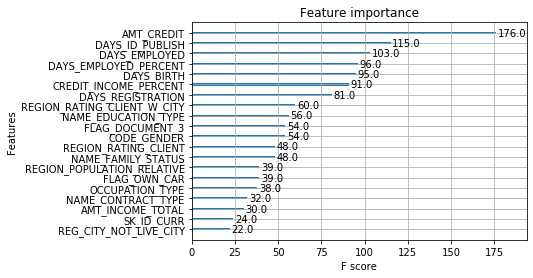

In [63]:
xgb.plot_importance(xgb_model,importance_type='weight', max_num_features=20)

In [64]:
pred_xgb=xgb_model.predict(X_test)
xgb_score =xgb_model.score(X_train,y_train)
xgb_pred_score =round(xgb_score*100,2)
print(xgb_pred_score)

91.96


In [65]:
train_xgb = xgb_model.predict_proba(X_train)[:, 1]
test_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_score_train_xgb = roc_auc_score(y_train,train_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test,test_xgb)

In [66]:
MAE_xgb, MSE_xgb, RMSE_xgb, R2_xgb = print_evaluate(y_test,pred_xgb)

MAE: 0.0814165239447612
MSE: 0.0814165239447612
RMSE: 0.28533580908249356
R2 Square -0.08863268942567548


## Catboost Classifier

In [67]:
import catboost as cat

model_catboost = cat.CatBoostClassifier(**{'iterations':10000,
                                           'learning_rate':0.005,
                                            'depth': 3,
                                            'l2_leaf_reg': 40,
                                            'bootstrap_type': 'Bernoulli',
                                            'subsample': 0.7,
                                            'scale_pos_weight': 5,
                                            'eval_metric': 'AUC',
                                            'od_type': 'Iter',
                                            'allow_writing_files': False})
model_catboost.fit(X_train,y_train, early_stopping_rounds=1000, verbose=1000)

0:	total: 119ms	remaining: 19m 48s
1000:	total: 30s	remaining: 4m 29s
2000:	total: 1m 1s	remaining: 4m 5s
3000:	total: 1m 35s	remaining: 3m 41s
4000:	total: 2m 9s	remaining: 3m 14s
5000:	total: 2m 42s	remaining: 2m 42s
6000:	total: 3m 19s	remaining: 2m 12s
7000:	total: 3m 53s	remaining: 1m 40s
8000:	total: 4m 34s	remaining: 1m 8s
9000:	total: 5m 17s	remaining: 35.2s
9999:	total: 5m 53s	remaining: 0us


In [68]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_test,y_test)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

88.39

In [69]:
MAE_catboost, MSE_catboost, RMSE_catboost, R2_catboost = print_evaluate(y_test,pred_catboost)

MAE: 0.11609252715329417
MSE: 0.11609252715329417
RMSE: 0.34072353478046413
R2 Square -0.5522907873450917


In [70]:
train_catboost = model_catboost.predict_proba(X_train)[:, 1]
test_catboost = model_catboost.predict_proba(X_test)[:, 1]
roc_auc_score_train_catboost = roc_auc_score(y_train,train_catboost)
roc_auc_score_test_catboost = roc_auc_score(y_test,test_catboost)

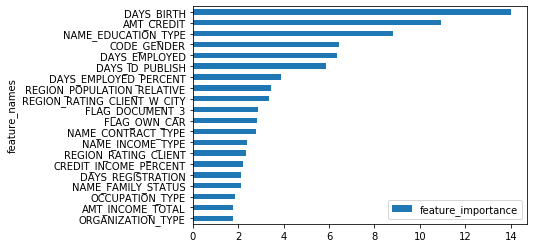

In [71]:
catboost_feature_df = pd.DataFrame({'feature_importance': model_catboost.get_feature_importance(), 
                              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                                       ascending=False)
catboost_feature_df[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

## LGBM Classifier

In [72]:
from lightgbm import LGBMClassifier

model_lightgbm = LGBMClassifier(**{ 'n_estimators':200,
                                    'learning_rate':0.1,
                                    'num_leaves':123,
                                    'colsample_bytree':0.8,
                                    'subsample':0.9,
                                    'max_depth':15,
                                    'reg_alpha':0.1,
                                    'reg_lambda':0.1,
                                    'min_split_gain':0.01,
                                    'min_child_weight':2 })
model_lightgbm.fit(X_train,y_train)
pred_lightgbm=model_lightgbm.predict(X_test)
lightgbm_score =model_lightgbm.score(X_train,y_train)
lightgbm_pred_score =round(lightgbm_score*100,2)
print(lightgbm_pred_score)

92.26


In [73]:
MAE_lightgbm, MSE_lightgbm, RMSE_lightgbm, R2_lightgbm = print_evaluate(y_test,pred_lightgbm)

MAE: 0.08160079779738548
MSE: 0.08160079779738548
RMSE: 0.2856585335630383
R2 Square -0.09109664305638199


In [74]:
train_lightgbm = model_lightgbm.predict_proba(X_train)[:, 1]
test_lightgbm  = model_lightgbm.predict_proba(X_test)[:, 1]
roc_auc_score_train_lightgbm = roc_auc_score(y_train,train_lightgbm)
roc_auc_score_test_lightgbm = roc_auc_score(y_test,test_lightgbm)

## Classification Report

In [75]:
from sklearn.metrics import classification_report

print('XGBoost')
print(classification_report(y_test,pred_xgb))

print('CatBoost')
print(classification_report(y_test,pred_catboost))

print('Lightgbm')
print(classification_report(y_test,pred_lightgbm))

XGBoost
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84743
           1       0.00      0.00      0.00      7511

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.84      0.92      0.88     92254

CatBoost
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     84743
           1       0.22      0.17      0.19      7511

    accuracy                           0.88     92254
   macro avg       0.57      0.56      0.56     92254
weighted avg       0.87      0.88      0.88     92254

Lightgbm
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84743
           1       0.30      0.00      0.00      7511

    accuracy                           0.92     92254
   macro avg       0.61      0.50      0.48     92254
weighted avg       0.87      0.92      0.88     

In [76]:
Score_data = [('Logistic Regression', log_pred_score, MAE_log, MSE_log, RMSE_log, R2_log, roc_auc_score_train_log, roc_auc_score_test_log),
              ('XGBoost', xgb_pred_score, MAE_xgb, MSE_xgb, RMSE_xgb, R2_xgb, roc_auc_score_train_xgb, roc_auc_score_test_xgb),
              ('CatBoost', catboost_pred_score, MAE_catboost, MSE_catboost, RMSE_catboost, R2_catboost, roc_auc_score_train_catboost, roc_auc_score_test_catboost),
              ('Lightgbm', lightgbm_pred_score, MAE_lightgbm, MSE_lightgbm, RMSE_lightgbm, R2_lightgbm, roc_auc_score_train_lightgbm, roc_auc_score_test_lightgbm)
             ]
Score_df = pd.DataFrame(data= Score_data, columns = ['Model', 'Prediction Score', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'ROC AUC Train', 'ROC AUC Test'])
Score_df.set_index('Model', inplace=True)
Score_df

,Prediction Score,MAE,MSE,RMSE,R2 Square,ROC AUC Train,ROC AUC Test
Model,,,,,,,
Logistic Regression,91.96,0.081417,0.081417,0.285336,-0.088633,0.582061,0.578907
XGBoost,91.96,0.081417,0.081417,0.285336,-0.088633,0.693049,0.671894
CatBoost,88.39,0.116093,0.116093,0.340724,-0.552291,0.699247,0.678911
Lightgbm,92.26,0.081601,0.081601,0.285659,-0.091097,0.923151,0.664137


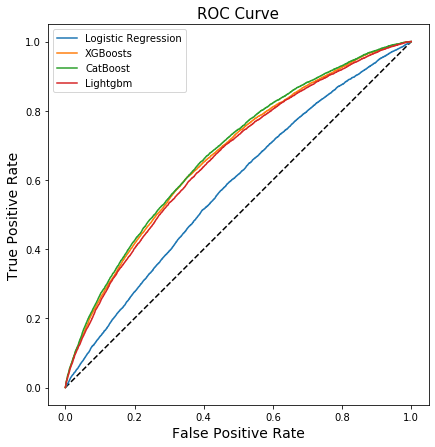

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')

model_log_proba=model_log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_log_proba)
plt.plot(fpr, tpr, label='Logistic Regression')

xgb_model_proba=xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,xgb_model_proba)
plt.plot(fpr, tpr, label='XGBoosts')

model_catboost_proba=model_catboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_catboost_proba)
plt.plot(fpr, tpr, label='CatBoost')

model_lightgbm_proba=model_lightgbm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_lightgbm_proba)
plt.plot(fpr, tpr, label='Lightgbm')

plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)
plt.legend()

## Conclusion
- Credit amount is the most important feature in the dataset
- CatBoost Classifier performs best throughout other algorithms